## Importing Data and Necessary Packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

In [2]:
#Creating a python array of state abbreviations
#Taken from https://gist.github.com/JeffPaine/3083347
states = ["US","AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
"SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


statesfull=['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut',
            'Delaware','District of Columbia','Florida','Georgia',
            'Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine',
            'Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska',
            'Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota',
            'Ohio','Oklahoma','Oregon','Pennsylvania','Puerto Rico',
            'Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont',
            'Virginia','Washington','West Virginia','Wisconsin','Wyoming']

In [18]:
def createDataFrame(emptySeries, arrayNames, textfileName, index, Column, skiprows=[0,1,2]):
    """
    Makes a dataframe with specific language information from excel file
    """
    i=0
    for area in arrayNames:

        df = pd.read_excel(textfileName, area, skiprows=skiprows).dropna()

        #dictionary[area] = df.loc[dictionaryindex1:dictionaryindex1,Column]
        emptySeries.set_value(i,df.loc[index, Column])
        i+=1


In [4]:
def plotFigure(english_speakers, other_speakers):
    """
    Takes the number of only English speakers and number of speakers of other languages, per Census file. 
    Returns two graphs with number of only English speakers and number of speakers of 
    other languages as normalized percentages of total population of those states. 
    """
    english_speakers_normalized = english_speakers/(english_speakers+other_speakers)
    other_speakers_normalized = other_speakers/(english_speakers+other_speakers)

    plt.figure(figsize=(20, 3))
    for i in range(1,51): 
        plt.bar(i, english_speakers_normalized[i])
        plt.autoscale(enable=True)
        plt.xticks(range(1,51), states[1:51])
        plt.title("Normalized Fraction of Solely English Speakers")
        plt.xlabel("State")
        plt.ylabel("Fraction of Solely English Speakers")

    plt.figure(figsize=(20, 3))
    for i in range(1,51):
        plt.bar(i, other_speakers_normalized[i])
        plt.autoscale(enable=True)
        plt.ylim([0.0,1.0])
        plt.xticks(range(1,51), states[1:51])
        plt.title("Normalized Percentage of Other Language Speakers")
        plt.xlabel("State")
        plt.ylabel("Fraction of Other Language Speakers")

# Bar Graphs of Other Language Speakers and English Language Speakers in Every State over Time

In [ ]:
## This isn't working yet

#English and Non-English Speakers for 2000, Creating dictionary and arrays
totallanguage_dict_00 = dict.fromkeys(states)
english2000=pd.Series()
other2000=pd.Series()
 

createDataFrame(english2000, states, "/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_2000.xlsx", 0, totallanguage_dict_00,"Number of speakers")
    
createDataFrame(other2000, states, "/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_2000.xlsx", 1, totallanguage_dict_00,"Number of speakers")

In [19]:
#English and Non-English Speakers for 2006, Creating dictionary and arrays
#totallanguage_dict_06 = dict.fromkeys(states)
english2006=pd.Series()
other2006=pd.Series()
txtfile2006 = "/home/alli/The-Mother-Tongue-of-US-Communities/raw_data/DetailedLanguageSpoken_State_20062008.xls"

createDataFrame(english2006, states, txtfile2006, 1,"Number of speakers", skiprows=[0,1,2])
    
createDataFrame(other2006, states, txtfile2006, 2,"Number of speakers", skiprows=[0,1,2])

/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [27]:
#English and Non-English Speakers for 2009, Creating dictionary and arrays
#totallanguage_dict_09 = dict.fromkeys(statesfull)
english2009=pd.Series()
other2009=pd.Series()
txtfile2009 =  "/home/alli/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_State_2009-2013.xls"

#things that are different about this file : skiprows is [0,1,2,3], column is "NumberofSpeakers1" and states is statesfull
createDataFrame(english2009, statesfull, txtfile2009, 1,"Number of speakers1", skiprows=[0,1,2,3])
    
createDataFrame(other2009, statesfull, txtfile2009, 2, "Number of speakers1", skiprows=[0,1,2,3])

/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [33]:
statesfull.index('Pennsylvania')

38

In [34]:
english2009[38]

10769224

In [35]:
other2009[38]

1239179

In [ ]:
##2000 Import Trial 
i=0
j=0
com=0
arguement= False
for state in states:
    df = pd.read_excel("/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_2000.xlsx",state,skiprows=[0,1,2,3]).dropna()
    if(df["Area Name (State or County)"][j].find("County")==-1):
        com+=df.loc[j,"Number of speakers"]
        j+=1
    else:
        other2000.set_value(i,com)
        com=0
        i+=1
        continue;

In [ ]:
i=0
j=0
com=0
arguement= False
for state in states:
    df = pd.read_excel("/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_2000.xlsx",state,skiprows=[0,1,2,3]).dropna()
    english2000.set_value(i,df.loc[0,"Number of speakers"])
    i+=1
    
createDataFrame(english2000, states, "/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_2000.xlsx", 0, totallanguage_dict_00,"Number of speakers"):

Plotting the Bar Graphs of the Different Time Periods

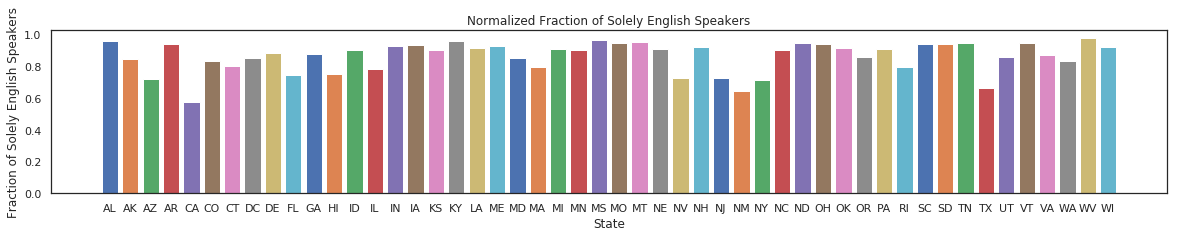

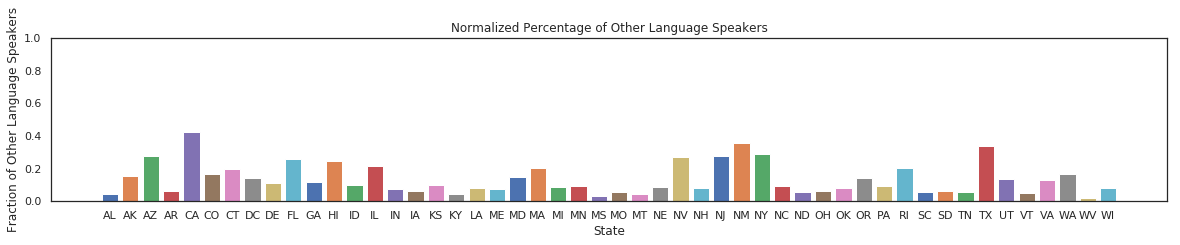

In [23]:
plotFigure(english2006, other2006 )

These graphs show on top the portion of the population for each state that only speaks English, and on the bottom the portion of the population for each state that speaks a language other than English. 

We see that a large portion of the population of all U.S. states only speak English. 

In [ ]:
index = other_speakers_normalized > 0.2
bleh=[i for i, x in enumerate(index) if x]
for i in bleh:
    print(states[i])

In [ ]:
print(str(states[other_speakers_normalized.idxmin()]))
print(str(other_speakers_normalized.min()))

In [ ]:
index = other_speakers_normalized < 0.05
bleh=[i for i, x in enumerate(index) if x]
for i in bleh:
    print(states[i])

In [ ]:
print("State with Most Only English Speakers :"+str(states[english_speakers_normalized.idxmax()]))

print("State with Most Speakers of Other Languages :"+str(states[other_speakers_normalized.idxmax()]))


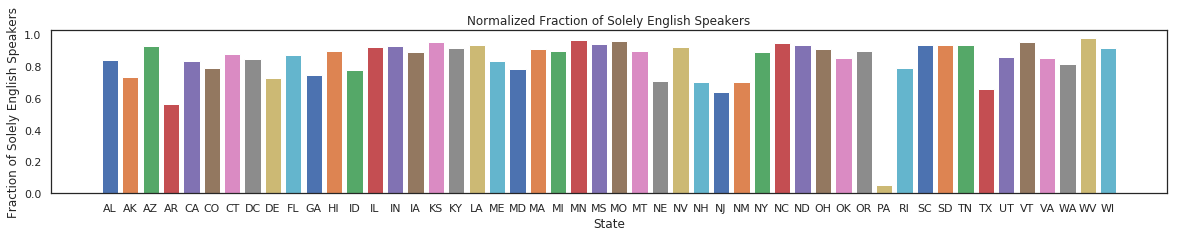

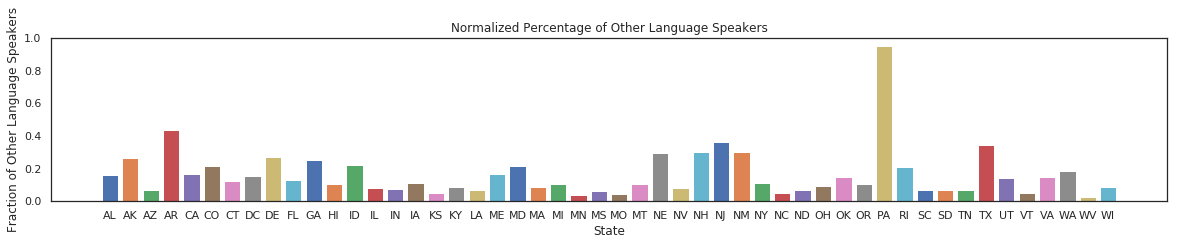

In [28]:
plotFigure(english2009, other2009 )

# Looking at Counties of Potential Interesting Areas

Next we will look at counties of states which had some of the most extreme ratios of speakers of only english to speakers of other languages. 

In [86]:
def createCountyDataFrame(emptySeries, emptySeries2, arrayNames, textfileName, index):
    """
    Makes a dataframe with specific language information from excel file
    """
    i=0
    x1 = pd.ExcelFile(textfileName)
    sheetnames = x1.sheet_names
    for sheet in sheetnames:
        if any(x in sheet for x in stateswerelookingat):
            df = pd.read_excel(textfileName,sheet, skiprows=[0,1,2,3]).dropna()
            #dictionary[area] = df.loc[1:2,"Number of speakers"]
            emptySeries.set_value(i,df["Number of speakers1"][index])
            emptySeries2.set_value(i, sheet)
            i+=1

In [87]:
stateswerelookingat = ["AZ", "CA", "HI", "WV"]
stateswerelookingatfull = ["Arizona", "California", "Hawaii"]
county = pd.Series()
otherspeakers_counties = pd.Series()
txtcounties2009 = "/home/alli/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_County_2009-2013.xls"
createCountyDataFrame(otherspeakers_counties, county,stateswerelookingat,txtcounties2009 , 1)

/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [88]:

otherspeakers2009 = pd.DataFrame(dict(county = county, otherspeakers_counties = otherspeakers_counties)).reset_index()

In [89]:
otherspeakers2009

,index,county,otherspeakers_counties
0,0,"Maricopa County, AZ",2661566
1,1,"Navajo County, AZ",62532
2,2,"Pima County, AZ",661590
3,3,"Alameda County, CA",817782
4,4,"Contra Costa County, CA",666701
5,5,"Fresno County, CA",484636
6,6,"Kern County, CA",448868
7,7,"Los Angeles County, CA",3991721
8,8,"Monterey County, CA",183807
9,9,"Orange County, CA",1558350


In [91]:
AZcounty = pd.Series()
otherspeakers_AZcounties = pd.Series()
createCountyDataFrame(otherspeakers_AZcounties, AZcounty,"AZ",txtcounties2009 , 1)


/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [96]:
otherspeakers_AZcounties

0     2661566
1       62532
2      661590
3      817782
4      666701
5      484636
6      448868
7     3991721
8      183807
9     1558350
10     285025
11    1243234
12     918792
13    1119072
14    1835381
15     429739
16     384305
17     369102
18     238937
19     823890
20     274881
21     342615
22     283971
23     481172
24     124102
25     142456
26     651239
27     116246
dtype: int64

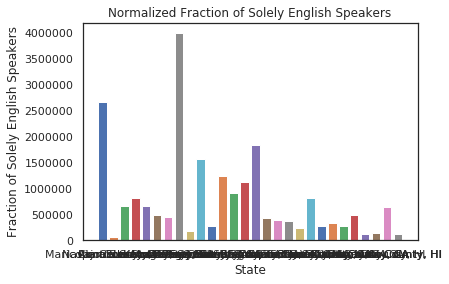

In [94]:
plt.figure()
for i in range(0,len(AZcounty)): 
    plt.bar(i, otherspeakers_AZcounties[i])
    plt.autoscale(enable=True)
    plt.xticks(range(0,len(AZcounty)), AZcounty[0:len(AZcounty)])
    plt.title("Other Language Speakers in Arizona by County")
    plt.xlabel("County")
    plt.ylabel("Fraction of Other Language Speakers")

Things to try : 
-plotting this bar graph by urban area
-plotting this bar graph for counties that look like they have extreme ratios( ie AL, CA) to see if ratios are consistent or varied inside these states

However, how diverse is this actually? We stipulate that if all the different languages spoken in a community are European languages, that changes the perception of how diverse the community is. 

take the extremes and show the the different languages for those states (pmf) 